<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />MSc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 3</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Themen dieses Notebooks:** Plots erstellen, Sortieren (BubbleSort), Timing und Komplexität

## Plots erstellen

In [5]:
using PyPlot

In [6]:
f(x) = x^2 - 2

x_values = -5:5
y_values = f.(x_values)

11-element Array{Int64,1}:
 23
 14
  7
  2
 -1
 -2
 -1
  2
  7
 14
 23

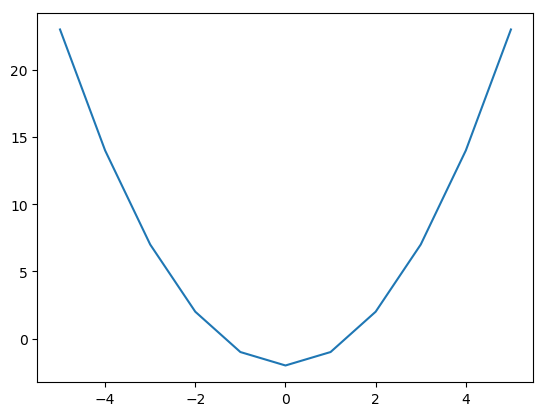

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000004D6B438>

In [7]:
plot(x_values, y_values)

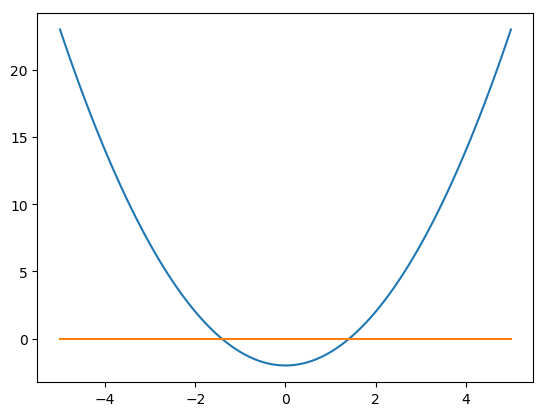

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000004F34358>

In [8]:
x_values = -5:0.1:5
plot(x_values, f.(x_values))
plot(x_values, zeros(length(x_values)))

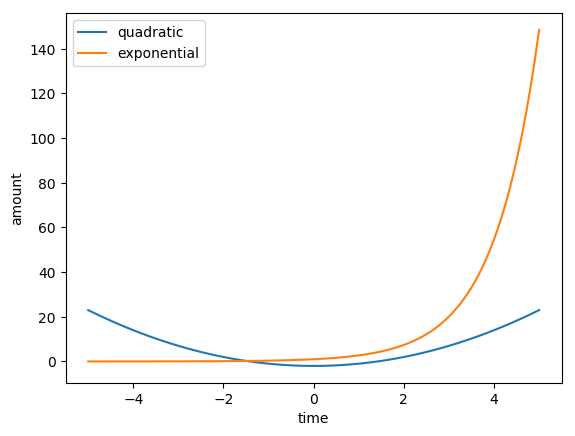

PyObject Text(24.000000000000007, 0.5, 'amount')

In [9]:
plot(x_values, f.(x_values), label="quadratic")
plot(x_values, exp.(x_values), label="exponential")
legend()
xlabel("time")
ylabel("amount")

## Sortieren

### Kurze Übung: Elemente in einem Array vertauschen

In [10]:
function swap(a, i, j)
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp
    return a
end

swap (generic function with 1 method)

In [11]:
a = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [12]:
swap(a, 6, 10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
 10
  7
  8
  9
  6

In [13]:
a

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
 10
  7
  8
  9
  6

In Julia gibt es die Konvention, dass Funktionen die mindestens eines ihrer Funktionsargumente modifizieren, mit einem Ausrufezeichen am Ende versehen werden.

In [14]:
function swap!(a, i, j)
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp
    return a
end

swap! (generic function with 1 method)

In [15]:
issorted(a)

false

In [16]:
sort(a)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [17]:
a

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
 10
  7
  8
  9
  6

In [18]:
sort!(a)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [19]:
a

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [20]:
issorted(a)

true

### Selbst sortieren: BubbleSort

**Bubble Schritt**

In [22]:
a = rand(1:10, 10)

10-element Array{Int64,1}:
  3
 10
  2
  8
  2
 10
  7
  5
  9
 10

In [25]:
last = length(a)-1

for i in 1:last
    if a[i] > a[i+1] # wenn links größer als rechts
        swap!(a, i, i+1)
    end
end

In [26]:
a

10-element Array{Int64,1}:
  2
  3
  2
  8
  7
  5
  9
 10
 10
 10

"Die Zahl 10 ist wie eine Blase (Bubble) im Array aufgestiegen", d.h. ans Ende gewandert.

Wir könnten diesen Vorgang nun so oft wiederholen, bis das Array sortiert ist. Da wir allerdings schon wissen, dass die Größte Zahl bereits am Ende steht reicht es das Teilarray mit den Elementen `a[1]` bis `a[length(a) - 1]` zu sortieren.

Diese Logik führt uns zum [Bubble Sort](https://de.wikipedia.org/wiki/Bubblesort) Algorithmus.

#### Bubble Sort Algorithmus

In [27]:
function bubblesort!(a)
    N = length(a)
    
    for last in N:-1:2
        for i in 1:(last-1)
            if a[i] > a[i+1] # wenn links größer als rechts
                swap!(a, i, i+1)
            end
        end
    end
    
    return a
end

bubblesort! (generic function with 1 method)

In [30]:
a = rand(1:10, 10)

10-element Array{Int64,1}:
  1
 10
  1
  3
  2
 10
  7
  2
  1
  6

In [31]:
bubblesort!(a)

10-element Array{Int64,1}:
  1
  1
  1
  2
  2
  3
  6
  7
 10
 10

In [32]:
issorted(a)

true

### Visualisierung

In [33]:
# Der folgende Code ist kein Vorlesungsinhalt!
using PyPlot, Random

function show_bubble_schritt(n)
    a = shuffle(1:n)
    
    pygui(true)
    fig = figure()
    title("Bubble-Schritt")
    for last = length(a):-1:length(a)
        # bubble-Schritt
        for i in 1:last-1
            if a[i]>a[i+1]
                swap!(a, i, i+1)
            end
            fig.clear()
            bar(1:length(a), a)
            m, mind = findmax(a)
            bar(mind, m, color="red")
            sleep(0.001)
        end
    end
    pygui(false)
    nothing
end

function show_bubble_sort(n)
    a = shuffle(1:n)
    
    pygui(true)
    fig = figure()
    title("Bubble-Sort")
    for last = length(a):-1:2
        # bubble-Schritt
        for i in 1:last-1
            if a[i]>a[i+1]
                swap!(a, i, i+1)
            end
        end
        fig.clear()
        bar(1:length(a), a)
        m, mind = findmax(a[1:last])
        bar(mind, m, color="red")
        sleep(0.001)
    end
    pygui(false)
    nothing
end

show_bubble_sort (generic function with 1 method)

In [36]:
show_bubble_schritt(40)

In [39]:
show_bubble_sort(40)

## Timing und Komplexität

### Zeitmessung

In [40]:
b = rand(50000);

In [41]:
@time bubblesort!(b);

  3.869518 seconds (40.42 k allocations: 2.117 MiB)


In [42]:
function benchmark_bubblesort()
    number_count = [0.0]
    elapsed_time = [0.0]

    for i in 1:16
        b = rand(2^i)
        t = @elapsed bubblesort!(b)
        println(2^i, "\t", t)
        push!(number_count, 2^i)
        push!(elapsed_time, t)
    end
    
    return number_count, elapsed_time
end

benchmark_bubblesort (generic function with 1 method)

In [43]:
number_count, elapsed_time = benchmark_bubblesort();

2	4.0e-7
4	3.0e-7
8	2.0e-7
16	8.0e-7
32	1.9e-6
64	6.8e-6
128	2.6199e-5
256	9.1e-5
512	0.000239
1024	0.0008962
2048	0.0037784
4096	0.015651501
8192	0.090038
16384	0.430842301
32768	1.9078977
65536	7.7988772


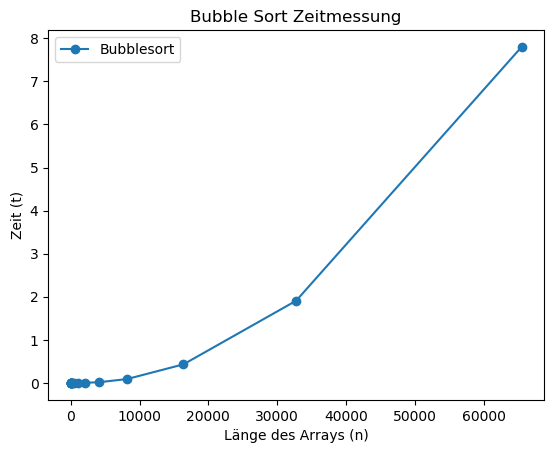

PyObject Text(0.5, 1.0, 'Bubble Sort Zeitmessung')

In [44]:
plot(number_count, elapsed_time, marker="o", label="Bubblesort");
legend()
xlabel("Länge des Arrays (n)");
ylabel("Zeit (t)");
title("Bubble Sort Zeitmessung")

Frage: Wie skaliert die Bubble Sort Laufzeit mit der Array Länge $n$?

### Polynomieller Fit auf einer Log-Log-Skala

In [45]:
using Polynomials

# fit straight line in loglog space (ignoring first couple of datapoints)
# Syntax: polyfit(x,y, polynomial_degree)
p = polyfit(log.(number_count[7:end]), log.(elapsed_time[7:end]), 1)
m = p.a[2] # Steigung

2.0283914939444423

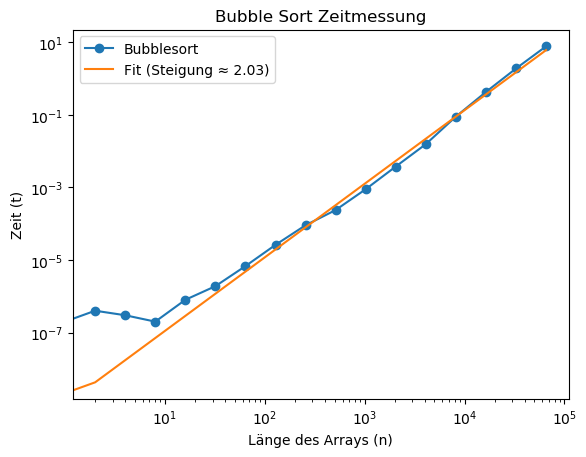

PyObject Text(0.5, 1.0, 'Bubble Sort Zeitmessung')

In [46]:
plot(number_count, elapsed_time, marker="o", label="Bubblesort");
plot(number_count, exp.(p.(log.(number_count))), label="Fit (Steigung ≈ $(round(m, digits=2)))")
legend();
xscale("log")
yscale("log")
xlabel("Länge des Arrays (n)");
ylabel("Zeit (t)");
title("Bubble Sort Zeitmessung")

**Komplexität (asymptotisches Verhalten):** BubbleSort $\in \mathcal{O}(n^2)$

O-Notation: https://de.wikipedia.org/wiki/Landau-Symbole#Beispiele_und_Notation

### Vergleich mit Julia's `sort!`

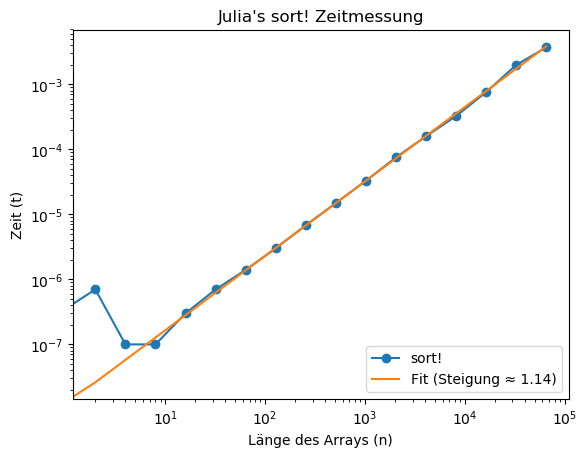

In [52]:
function benchmark_juliasort()
    number_count = [0.0]
    elapsed_time = [0.0]

    for i in 1:16
        b = rand(2^i)
        t = @elapsed sort!(b)
        push!(number_count, 2^i)
        push!(elapsed_time, t)
    end
    
    return number_count, elapsed_time
end

number_count, elapsed_time = benchmark_juliasort();

# fit straight line in loglog space (ignoring first couple of datapoints)
p = polyfit(log.(number_count[7:end]), log.(elapsed_time[7:end]), 1)
m = p.a[2]

plot(number_count, elapsed_time, marker="o", label="sort!");
plot(number_count, exp.(p.(log.(number_count))), label="Fit (Steigung ≈ $(round(m, digits=2)))")
legend(loc=4);
xscale("log")
yscale("log")
xlabel("Länge des Arrays (n)");
ylabel("Zeit (t)");
title("Julia's sort! Zeitmessung");

Übersicht der Komplexität verschiedener Sortierverfahren: https://de.wikipedia.org/wiki/Sortierverfahren

## Randnotiz zu Zeitmessungen: BenchmarkTools.jl

Randnotiz: Die Macros `@time` und `@elapsed` sind hilfreich, sollten jedoch meistens vermieden werden, da Nebeneffekte das Messergebnis verzerren können. Führen Sie beispielsweise `@time sort(rand(1000));` zweimal aus und beobachten Sie, wie sich das Ergebnis ändert.

Es ist stattdessen empfehlenswert `@btime` und `@belapsed` aus dem Paket [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) zu verwenden.

Demonstration:

In [1]:
@time sort!(rand(1000));

  0.000087 seconds (10 allocations: 27.500 KiB)


In [4]:
@time sort!(rand(1000));

  0.000039 seconds (1 allocation: 7.938 KiB)


In [5]:
using BenchmarkTools

In [6]:
@btime sort(rand(1000));

  30.700 μs (2 allocations: 15.88 KiB)


In [7]:
@btime sort(rand(1000));

  32.700 μs (2 allocations: 15.88 KiB)
